In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
from matplotlib import pyplot as plt
 
import uuid
import json
import time
import cv2
import requests

In [5]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [7]:
# def put_text(image, text, x, y, color=(0, 255, 0), font_size=22):
#     if type(image) == np.ndarray:
#         color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = Image.fromarray(color_coverted)
 
#     if platform.system() == 'Darwin':
#         font = 'AppleGothic.ttf'
#     elif platform.system() == 'Windows':
#         font = 'malgun.ttf'
        
#     image_font = ImageFont.truetype(font, font_size)
#     font = ImageFont.load_default()
#     draw = ImageDraw.Draw(image)
 
#     draw.text((x, y), text, font=image_font, fill=color)
    
#     numpy_image = np.array(image)
#     opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
 
#     return opencv_image

In [26]:
api_url = 'https://y14d5d51hp.apigw.ntruss.com/custom/v1/26742/23964ba10a3883f71edc2f4b3306341b60cc1160e9631e837f3acb52cecea25a/general'
secret_key = 'cnBldk95Z2JySGZvQXpjS3dhemR0bGxIU3luRUxvQU8='

In [27]:
path = 'C:/Users/a/Desktop/KakaoTalk_20231130_021002046.jpg'
files = [('file', open(path,'rb'))]

In [15]:
#API 요청하기
request_json = {'images': [{'format': 'jpg',
                                'name': 'demo'
                               }],
                    'requestId': str(uuid.uuid4()),
                    'version': 'V2',
                    'timestamp': int(round(time.time() * 1000))
                   }
 
payload = {'message': json.dumps(request_json).encode('UTF-8')}
 
headers = {
  'X-OCR-SECRET': secret_key,
}
 
response = requests.request("POST", api_url, headers=headers, data=payload, files=files)
result = response.json()

cnt : 233
vertices_list : [{'x': 1073.0, 'y': 519.0}, {'x': 1382.0, 'y': 511.0}, {'x': 1384.0, 'y': 590.0}, {'x': 1075.0, 'y': 599.0}]
pts : [(1073.0, 519.0), (1382.0, 511.0), (1384.0, 590.0), (1075.0, 599.0)]


cnt : 234
vertices_list : [{'x': 1407.0, 'y': 514.0}, {'x': 1711.0, 'y': 514.0}, {'x': 1711.0, 'y': 589.0}, {'x': 1407.0, 'y': 589.0}]
pts : [(1407.0, 514.0), (1711.0, 514.0), (1711.0, 589.0), (1407.0, 589.0)]


cnt : 235
vertices_list : [{'x': 1736.0, 'y': 518.0}, {'x': 1971.0, 'y': 518.0}, {'x': 1971.0, 'y': 596.0}, {'x': 1736.0, 'y': 596.0}]
pts : [(1736.0, 518.0), (1971.0, 518.0), (1971.0, 596.0), (1736.0, 596.0)]


cnt : 236
vertices_list : [{'x': 600.0, 'y': 650.0}, {'x': 671.0, 'y': 650.0}, {'x': 671.0, 'y': 704.0}, {'x': 600.0, 'y': 704.0}]
pts : [(600.0, 650.0), (671.0, 650.0), (671.0, 704.0), (600.0, 704.0)]


cnt : 237
vertices_list : [{'x': 689.0, 'y': 650.0}, {'x': 936.0, 'y': 650.0}, {'x': 936.0, 'y': 707.0}, {'x': 689.0, 'y': 707.0}]
pts : [(689.0, 650.0), (936.0

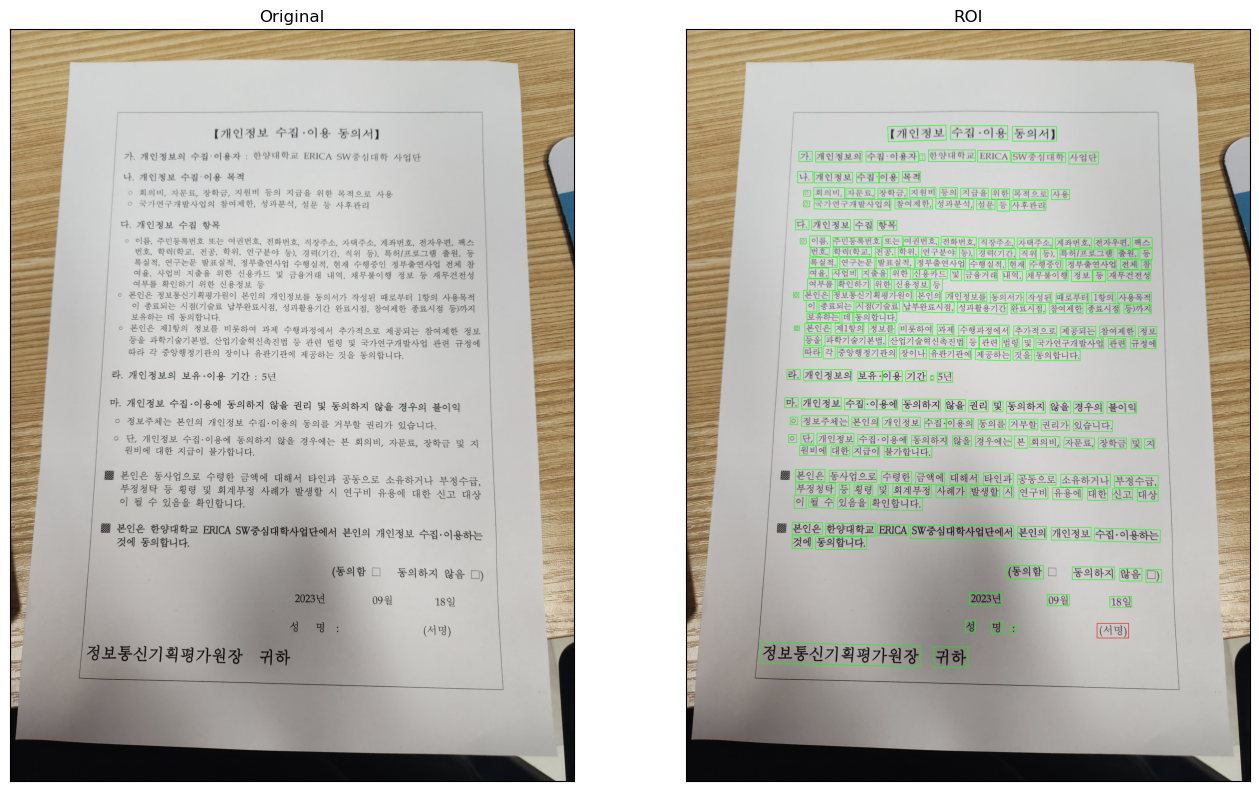

In [84]:
img = cv2.imread(path)
roi_img = img.copy()

text=""
result_text=""
# cnt=0
for field in result['images'][0]['fields']:
    text = field['inferText']
    result_text+= text
    vertices_list = field['boundingPoly']['vertices']
    cnt+=1
    print(f"cnt : {cnt}")
    print(f"vertices_list : {vertices_list}")
    pts = [tuple(vertice.values()) for vertice in vertices_list]
    print(f"pts : {pts}")
    print('\n')
    topLeft = [int(_) for _ in pts[0]]
    topRight = [int(_) for _ in pts[1]]
    bottomRight = [int(_) for _ in pts[2]]
    bottomLeft = [int(_) for _ in pts[3]]
    
    #초록색 바운딩 박스 그리기
    cv2.line(roi_img, topLeft, topRight, (0,255,0), 2)
    cv2.line(roi_img, topRight, bottomRight, (0,255,0), 2)
    cv2.line(roi_img, bottomRight, bottomLeft, (0,255,0), 2)
    cv2.line(roi_img, bottomLeft, topLeft, (0,255,0), 2)
    #roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] - 10, font_size=30)

    ######################################################경우의 수 늘리기 / 더 수정 필요 #########################################################
    ##############################################################################################################################################
    #서명 부분 빨간색으로 바운딩 박스 그리기
    if text == "(서명)":
        print(f"Bounding Box Coordinates for '(서명)': TopLeft={topLeft}, TopRight={topRight}, BottomRight={bottomRight}, BottomLeft={bottomLeft}")
        target_topLeft, target_topRight, target_bottomRight, target_bottomLeft = topLeft, topRight, bottomRight, bottomLeft

        #빨간색 바운딩 박스 그리기
        cv2.line(roi_img, target_topLeft, target_topRight, (0,0,255), 2)
        cv2.line(roi_img, target_topRight, target_bottomRight, (0,0,255), 2)
        cv2.line(roi_img, target_bottomRight, target_bottomLeft, (0,0,255), 2)
        cv2.line(roi_img, target_bottomLeft, target_topLeft, (0,0,255), 2)
    ##############################################################################################################################################
    ##############################################################################################################################################
print(result_text)
 
plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

In [35]:
#text를 .txt파일로 저장
import datetime

timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

output_file_path = f'output_{timestamp}.txt'

with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write(text)

print(f'Text saved to: {output_file_path}')

Text saved to: output_20231206012336.txt
